# European Call Option Pricing

## Import Libraries

In [1]:
import numpy as np
from scipy.stats import norm
import sys
from BSM_option_valuation import BSM_call_value
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
sys.path.append('05_com')

## Market-Based Valuation Model

For a European call option on an index with strike and index level above the strike price (in-the-money) at maturity, the option holder receives the difference from option writer.

If the index level is below the strike, the option expires worless (out-of-the-money) at maturity, the option holder do not have to pay anything.

- in-the-money (ITM): a call(put) if S > K (S < K)
- at-the-money (ATM): a call(put) if S = K
- out-of-the-money (OTM): a call(put) if S < K (S > K)

In [2]:
def mbvaluation(K, min, max, n):
    S = np.linspace(min, max, n)  # index level values
    h = np.maximum(S - K, 0)      # inner values of call option
    
    plt.figure()
    plt.plot(S, h, lw=2.5)        # plot inner values at maturity
    plt.title('Market-Based Valuation Model for call option')
    plt.xlabel('index level $S_t$ at maturity')
    plt.ylabel('inner value of European call option')
    plt.grid(True)

K: 8000
Min: 4000
Max: 12000
Num: 150


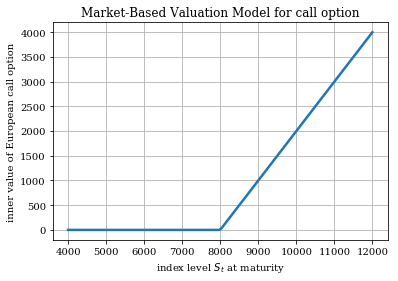

In [3]:
# input call option parameters:
K = (input("K: "))                            # strike
min = (input("Min: "))                        # min index level value
max = (input("Max: "))                        # max index level value
n= (input("n: "))                             # number of samples to generate.

mbvaluation(K, min, max, n)

## Black-Scholes-Merton (BSM) model

The Black-Scholes-Merton model is a model of price variation over time of financial instruments and often be used to determine the price of a European call option. The persent value of the option is always above the (undiscounted) inner value. IN this sense, the option's present vale is composed of the inner value plus time value.

In [7]:
def bs_price(K, min, max, n, T, r, sigma):
    S = np.linspace(min, max, n)                                # index level values
    h = np.maximum(S - K, 0)                                    # inner values of call option
    C = [BSM_call_value(St, K, 0, T, r, sigma) for St in S]     # calculate call option values
    
    # Graphical Output
    plt.figure()
    plt.plot(S, h, 'b-', lw=2.5, label = 'inner value')         # plot inner values at maturity
    plt.plot(S, C, 'r-.', lw=2.5, label = 'present value')      # plot option present value
    plt.grid(True)
    plt.legend(loc=0)
    plt.title('Black-Scholes-Merton(BSM) pricing for ')
    plt.xlabel('index level $S_0$')
    plt.ylabel('present value $C(t=0)$')

r: 0.01
sigma: 0.05
K: 8000
Min: 4000
Max: 12000
T: 10
n: 100


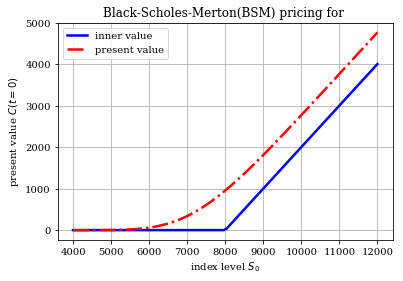

In [8]:
# input call option parameters:
r = (input("r: "))                            # risk-free rate
sigma = (input("sigma: "))                    # constant volatility
K = (input("K: "))                            # strike price
min = (input("Min: "))                        # min index level value
max = (input("Max: "))                        # max index level value
T= (input("T: "))                             # number of descrete time steps till maturity
n= (input("n: "))                             # number of samples to generate.


bs_price(K, min, max, n, T, r, sigma)

## European call option price- BSM model

In [11]:
# input call option parameters:
r = (input("r: "))                   # risk-free rate
sigma = (input("sigma: "))           # volatility
K = (input("K: "))                   # strike price
St = (input("St: "))                 # spot at time 0
T= (input("T: "))                    # number of descrete time steps till maturity


print "Option price with BS is:", BSM_call_value(St, K, 0, T, r, sigma)

r: 0.01
sigma: 0.05
K: 8000
St: 9000
T: 10
Option price with BS is: 1715.0388376928795


### Altneration- Function created

In [13]:
def bsprice(r, sigma, K, S0, T):
    disc = np.exp(-r*T)             #discounting
    vol = sigma*np.sqrt(T)          #time-scaled volatility

    # calculate price analytically using Black-Scholes
    d1 = ((np.log(St/K)+(r+0.5*sigma**2)*T))/vol
    d2 = d1-vol
    BSprice = S0*norm.cdf(d1)-disc*K*norm.cdf(d2)
    print "Option price with BS is:", BSprice

In [14]:
# input call option parameters:
r = (input("r: "))                   # risk-free rate
sigma = (input("sigma: "))           # constant volatility
K = (input("K: "))                   # strike price
St = (input("St: "))                 # spot at time 0
T= (input("T: "))                    # number of descrete time steps till maturity


bsprice(r, sigma, K, St, T)

r: 0.01
sigma: 0.05
K: 8000
St: 9000
T: 10
Option price with BS is: 1715.0388376928768


## Monte Carlo Simulation

The Monte Carlo Simulation is a probability distribution technique used to understand the impact of risk and uncertainty in financial, project management, cost, and other forecasting models. It calculates results over and over, each time using a different set of random values from the probability functions. Pricing the financial dervative such as European Call Option can be broadly split into finding expectations analytically or via a simulation.

In [ ]:
def mcprice(n, rf, sigma, K, S0, T):

    disc = np.exp(-rf*T)  
    vol = sigma*np.sqrt(T)
    
    # simulate N terminal prices by using normal distribution
    rands=np.random.normal(size=n)
    
    # calculate price analytically using Monte Carlo Simulation
    ST=S0*np.exp((rf-0.5*sigma*sigma)*T + vol*rands)
    payoff = np.multiply([p if p > 0 else 0 for p in ST-K], disc)   #inner value
    MCprice = np.mean(payoff,axis=0)
    print "Option price with MC is:", MCprice
    
    #Plot the Histogram of terminate price using Monte Carlo Probabilistic Simulation
    plt.hist(payoff, bins=100, color='red', alpha=0.7)              # plot inner values at maturity
    plt.title("Histogram of terminate price using Monte Carlo Probabilistic Simulation")
    plt.xlabel('price')
    plt.ylabel('posibilities')
    plt.grid(True)
    return plt

In [ ]:
# input call option parameters:
n = (input("Number of seed: "))               # number of seed
rf = (input("Risk-free rate: "))              # risk-free rate
sigma = (input("Sigma: "))                    # constant volatility
K = (input("Strike price: "))                 # strike
S0 = (input("Spot price: "))                  # spot at time 0
T= (input("Maturity: "))                      # number of descrete time steps till maturity


mcprice(n, rf, sigma, K, S0, T)